In [1]:
# importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.pipeline import make_pipeline
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.pipeline import make_pipeline
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [2]:
data = pd.read_csv('final_data.csv')

FileNotFoundError: [Errno 2] File b'final_data.csv' does not exist: b'final_data.csv'

In [55]:
data.head()

,pH,N,P,K,OC,Particles,Water_holding_content,Soil_type,crop_type
0,7.03,118.72,25.00,185.82,0.78,0.001686,1.40,clay,carrot
1,2.57,131.09,24.62,181.71,0.90,0.000381,1.31,clay,carrot
2,3.39,104.32,18.37,202.39,0.76,0.000226,1.35,clay,carrot
3,2.73,111.21,21.09,202.71,0.68,0.001399,1.22,clay,carrot
4,1.52,90.90,23.76,195.39,0.74,0.001587,1.21,clay,carrot


In [56]:
data['crop_type'].unique()

array(['carrot', 'coconut', 'cotten', 'groundnut', 'melon', 'millet',
       'potatoes', 'rice', 'vegetable', 'wheat'], dtype=object)

In [57]:
mapping = {'carrot':1,'coconut':2,
       'cotten':3,
       'groundnut':4, 'melon':5,
       'millet':6, 'potatoes':7,
       'rice':8,
       'vegetable':9, 'wheat':10}

In [58]:
data['crop_type'] = data['crop_type'].map(mapping)

In [59]:
data['Soil_type'].unique()

array(['clay', 'Sandy', 'loamy'], dtype=object)

In [60]:
mapping = {'clay':1, 'Sandy':2,
       'loamy':3}



data['Soil_type'] = data['Soil_type'].map(mapping)





In [61]:
data. head()

,pH,N,P,K,OC,Particles,Water_holding_content,Soil_type,crop_type
0,7.03,118.72,25.00,185.82,0.78,0.001686,1.40,1,1
1,2.57,131.09,24.62,181.71,0.90,0.000381,1.31,1,1
2,3.39,104.32,18.37,202.39,0.76,0.000226,1.35,1,1
3,2.73,111.21,21.09,202.71,0.68,0.001399,1.22,1,1
4,1.52,90.90,23.76,195.39,0.74,0.001587,1.21,1,1


In [42]:
from sklearn import preprocessing
#Select numerical columns which needs to be normalized


In [12]:
y

NameError: name 'y' is not defined

In [43]:
data.head()

,pH,N,P,K,OC,Particles,Water_holding_content,Soil_type,crop_type
0,7.03,118.72,25.00,185.82,0.78,0.001686,1.40,1,1
1,2.57,131.09,24.62,181.71,0.90,0.000381,1.31,1,1
2,3.39,104.32,18.37,202.39,0.76,0.000226,1.35,1,1
3,2.73,111.21,21.09,202.71,0.68,0.001399,1.22,1,1
4,1.52,90.90,23.76,195.39,0.74,0.001587,1.21,1,1


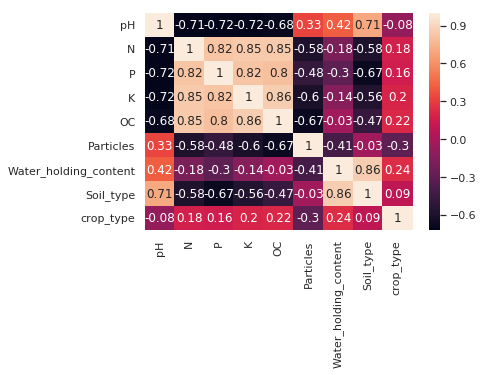

In [62]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

X=data.drop(['crop_type'], axis =1)
y=pd.DataFrame(mlb.fit_transform(data[['crop_type']].values), columns=mlb.classes_, index=data.index)

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [64]:
from sklearn.datasets import make_multilabel_classification

# this will generate a random multi-label dataset
X, Y = make_multilabel_classification(sparse = True, n_labels = 10,
return_indicator = 'sparse', allow_unlabeled = False)

ValueError: too many values to unpack (expected 1)

In [47]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=100)


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

knc.fit(X_train, Y_train)
Y_pred = knc.predict(X_test)

In [49]:
Y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.288

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(5000, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(Y_train.shape[1], activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy',])

model.fit(X_train, Y_train,epochs=5,batch_size=2000)

score = model.evaluate(X_test, Y_test, batch_size=2000)
score

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.gof.compilelock): Overriding existing lock by dead process '26337' (I am process '28145')


Epoch 1/5


In [51]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predicti

0.0

In [52]:
##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 300)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

NameError: name 'y_train' is not defined

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 44.5
The cross validated score for Gaussian Naive Bayes classifier is: 42.38


Text(0.5, 1.05, 'Confusion_matrix')

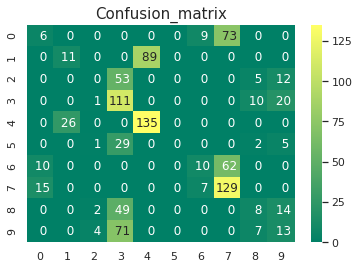

In [215]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 42.5
The cross validated score for Decision Tree classifier is: 40.39


Text(0.5, 1.05, 'Confusion_matrix')

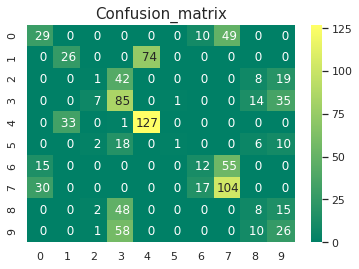

In [216]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=100,min_samples_leaf=4,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 55.5
The cross validated score for AdaBoostClassifier is: 45.36


Text(0.5, 1.05, 'Confusion_matrix')

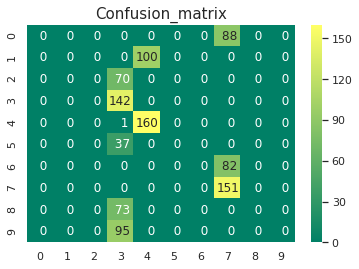

In [217]:
####ada boost
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)